### Binary Morphology
Author: Virly Y. Ananda <br>
Date: 08-14-2023 <br>

In [12]:
# Import packages
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#conda install -c conda-forge opencv

In [4]:
# Load grey scale and binary image
img_gray = plt.imread('/Users/virly/beta_script/computer-vision/A/230725_TAB_mBCD_dataCollection_376_crop.tif')
img_raw = plt.imread('/Users/virly/beta_script/computer-vision/230725_TAB_mBCD_dataCollection_376_crop.tif')

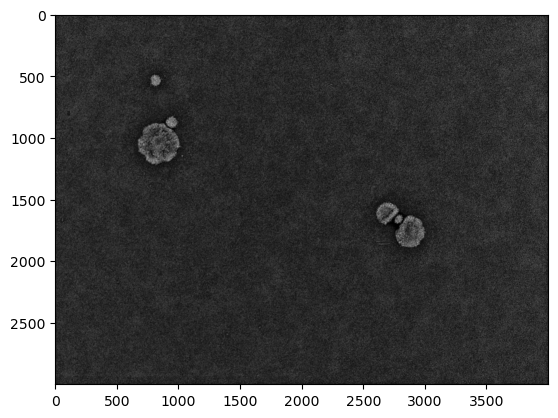

In [5]:
# Visualize gray image which has been background subtracted. Rolling ball algorithm with radius of 95 is used.
plt.imshow(img_gray,cmap='gray')

In [6]:
# Add bilateral filter
blur_bil = cv.bilateralFilter(img_gray,9,75,75)
# Add Gaussian filter
blur_gaus = cv.GaussianBlur(img_gray,(5,5),0)
# Add median filter
blur_med = cv.medianBlur(img_gray,5)

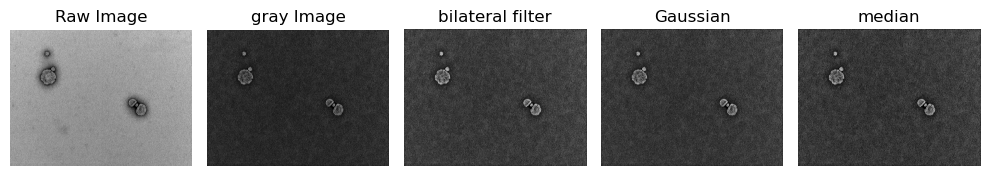

In [7]:
# Visualize filter differences
fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(nrows=1,
                                    ncols=5,
                                    figsize=(10, 2.5),
                                    sharex=True,
                                    sharey=True)
ax0.imshow(img_raw, cmap='gray')
ax0.set_title('Raw Image')
ax0.axis('off')

ax1.imshow(img_gray, cmap='gray')
ax1.set_title('gray Image')
ax1.axis('off')

ax2.imshow(blur_bil, cmap='gray')
ax2.set_title('bilateral filter')
ax2.axis('off')

ax3.imshow(blur_gaus, cmap='gray')
ax3.set_title('Gaussian')
ax3.axis('off')

ax4.imshow(blur_med, cmap='gray')
ax4.set_title('median')
ax4.axis('off')

fig.tight_layout()

In [8]:
# Create a specific threshold to detect ROIs based on the intensity level.
th = 60
raw_img_th = img_raw>th
gray_img_th = img_gray>th
bil_img_th = blur_bil>th
gaus_img_th = blur_gaus>th
med_img_th = blur_med>th

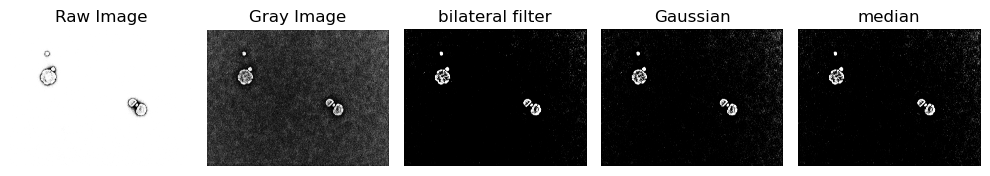

In [70]:
# Visualize filter differences
fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(nrows=1,
                                    ncols=5,
                                    figsize=(10, 2.5),
                                    sharex=True,
                                    sharey=True)
ax0.imshow(raw_img_th, cmap='gray')
ax0.set_title('Raw Image')
ax0.axis('off')

ax1.imshow(gray_img_th, cmap='gray')
ax1.set_title('Gray Image')
ax1.axis('off')

ax2.imshow(bil_img_th, cmap='gray')
ax2.set_title('bilateral filter')
ax2.axis('off')

ax3.imshow(gaus_img_th, cmap='gray')
ax3.set_title('Gaussian')
ax3.axis('off')

ax4.imshow(med_img_th, cmap='gray')
ax4.set_title('median')
ax4.axis('off')

fig.tight_layout()

Based on several filter methods, we found that bilateral filter seems to be the most accurate in performing binarization (without training). Background noise is smoothened while ROIs edges are preserved. Meanwhile, we see a more distinct present of noise on Gaussian and median filter.

#### Feature Extraction

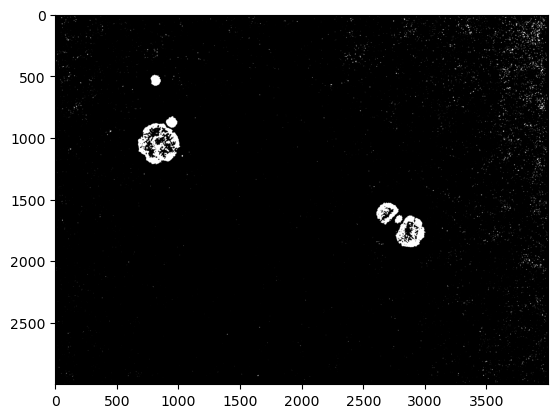

In [9]:
plt.imshow(bil_img_th,cmap='gray')

In [10]:
# Check for binarization: False and True means 0 and 1.
np.unique(bil_img_th)

array([False,  True])

In [13]:
# Building a kernel (structure): size of kernel 5x5
K_r = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))

In [14]:
type(K_r)

numpy.ndarray

In [15]:
K_r.dtype

dtype('uint8')

In [16]:
K_r

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [17]:
# Build an elipse kernel: Notice that area where 1 is present forms an ellipse structure compared to the rectangle kernel shown above
K_e = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10))
K_e

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 0]], dtype=uint8)

In [18]:
# Build a cross kernel
K_c = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
K_c

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [94]:
# Check the property of our chosen binary image
#type(bil_img_th)
bil_img_th.dtype

dtype('bool')

In [ ]:
#conda install -c anaconda pillow

In [20]:
# Save our chosen binary
from PIL import Image
im = Image.fromarray(bil_img_th)
im.save("binary_test.png")

In [30]:
# Check for binarization: False and True means 0 and 1.
im_binary = bil_img_th.astype(np.float32)
np.unique(im_binary)

array([0., 1.], dtype=float32)

In [27]:
# Apply Erosion to our binary image with various kernels we adjusted above
E_rec = cv2.erode(im_binary,K_r)
E_el = cv2.erode(im_binary,K_e)
E_cr = cv2.erode(im_binary,K_c)

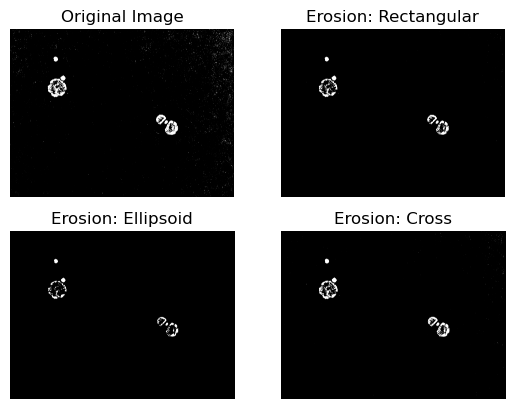

In [34]:
# Visualize results
plt.subplot(221)
plt.imshow(im_binary, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.subplot(222)
plt.imshow(E_rec, cmap='gray')
plt.title("Erosion: Rectangular")
plt.axis('off')
plt.subplot(223)
plt.imshow(E_el, cmap='gray')
plt.title("Erosion: Ellipsoid")
plt.axis('off')
plt.subplot(224)
plt.imshow(E_cr, cmap='gray')
plt.title("Erosion: Cross")
plt.axis('off')
plt.show()

In [32]:
# Apply Dilation
D_rec = cv2.dilate(im_binary,K_r)
D_el = cv2.dilate(im_binary,K_e)
D_cr = cv2.dilate(im_binary,K_c)

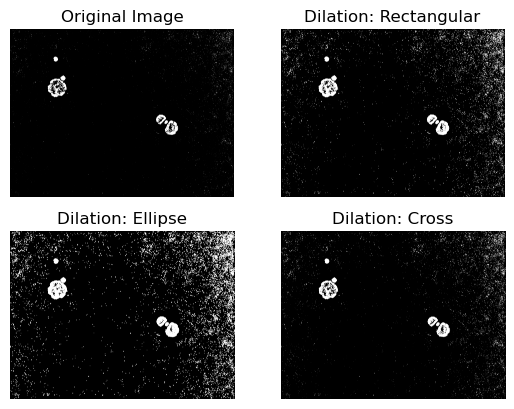

In [33]:
# Visualize results
plt.subplot(221)
plt.imshow(im_binary, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.subplot(222)
plt.imshow(D_rec, cmap='gray')
plt.title("Dilation: Rectangular")
plt.axis('off')
plt.subplot(223)
plt.imshow(D_el, cmap='gray')
plt.title("Dilation: Ellipse")
plt.axis('off')
plt.subplot(224)
plt.imshow(D_cr, cmap='gray')
plt.title("Dilation: Cross")
plt.axis('off')
plt.show()

Due to erosion ability in removing small noises around the edges, we'd also like to preserve our ROIs. To do this, we applied image opening technique.

To do this, we must have the same kernel on erosion and dilation.

In [35]:
# Check the property of our original binary image
im_binary.dtype

dtype('float32')

In [43]:
# Next, we need to convert the image above as boolean array.
im_bool = np.array(im_binary,dtype=bool)

In [44]:
im_bool.dtype

dtype('bool')

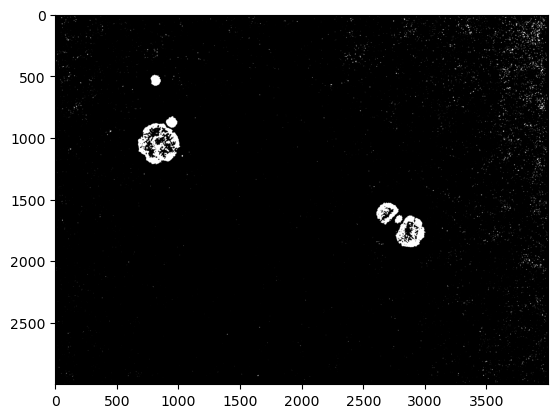

In [46]:
# Visualize the boolean form image
plt.imshow(im_bool, cmap='gray')

In [47]:
# Add noise: 0 and 1 is just column and row
N = np.random.rand(im_bool.shape[0],im_bool.shape[1])

In [74]:
# Define a binary noise
N_binary = N>2

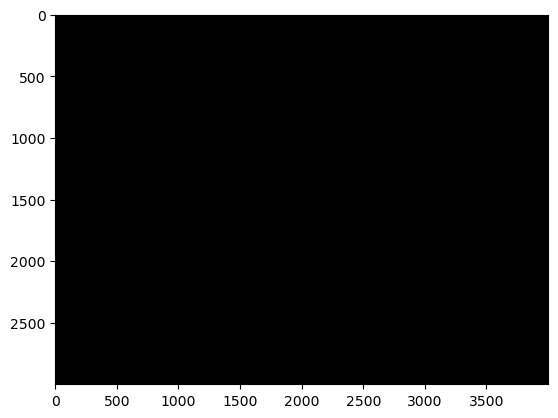

In [75]:
# Visualize our noise
plt.imshow(N_binary,cmap='gray')

In [76]:
img_N = im_bool | N_binary

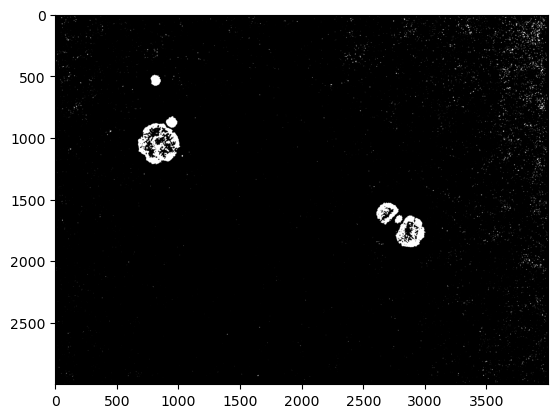

In [77]:
plt.imshow(img_N, cmap='gray')

In [78]:
O_r = cv2.morphologyEx(np.float32(img_N),cv2.MORPH_OPEN, K_r)

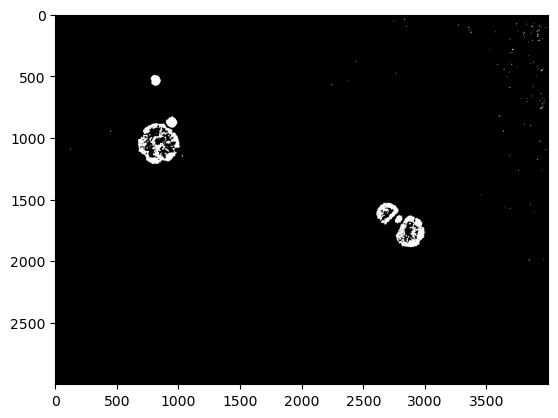

In [79]:
plt.imshow(O_r,cmap='gray')

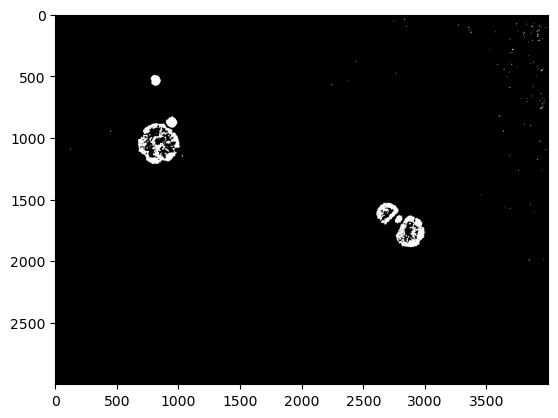

In [80]:
EN_rec = cv2.erode(np.float32(img_N),K_r)
ON_rec = cv2.dilate(E_rec,K_r)
plt.imshow(ON_rec,cmap='gray')

In [96]:
# Save our chosen binary
# Save our chosen binary
from PIL import Image
im2_bool = np.array(ON_rec,dtype=bool)
im2 = Image.fromarray(im2_bool)
im2.save("binary_test2.png")

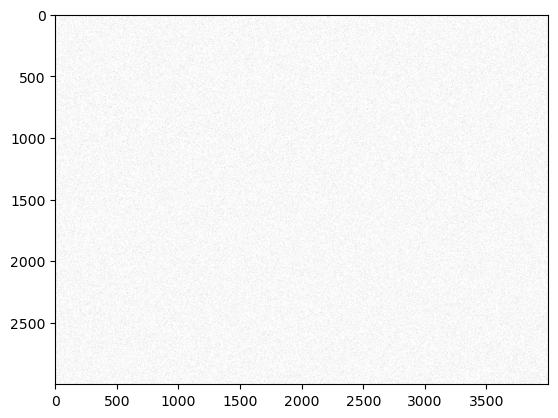

In [83]:
# Apply Closing Technique: Dilation followed by Erosion
# Create a binary noise
N_binary = N < 0.97
plt.imshow(N_binary, cmap='gray')

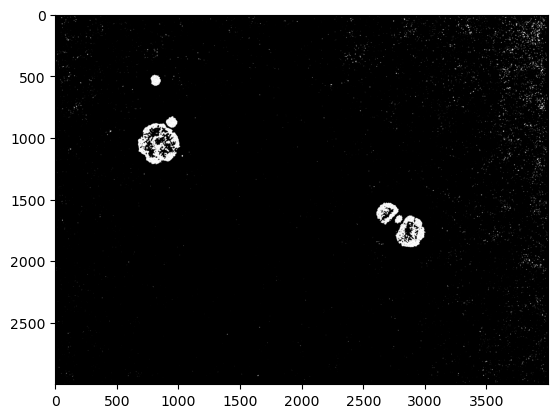

In [84]:
# Create image holes
img_H = im_bool & N_binary
plt.imshow(img_H, cmap='gray')

In [85]:
C_r = cv2.morphologyEx(np.float32(img_H),cv2.MORPH_CLOSE, K_r)

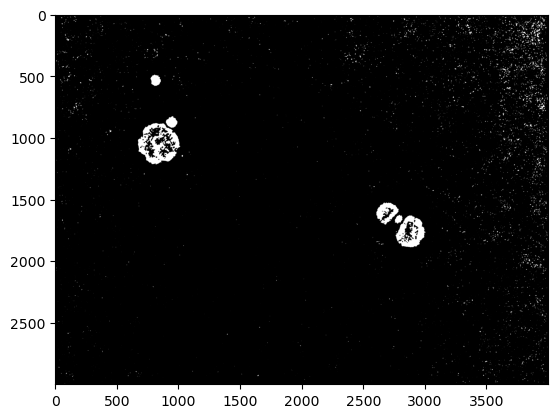

In [87]:
plt.imshow(C_r,cmap='gray') # NOT WORKING